<a href="https://colab.research.google.com/github/VivanBhatt/QuantumAlg_HW/blob/main/PHSX801_HW4_Old.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pennylane --upgrade

In [ ]:
import pennylane as qml
import numpy as np
#import matplotlib.pyplot as plt

**Circuits and QNodes**

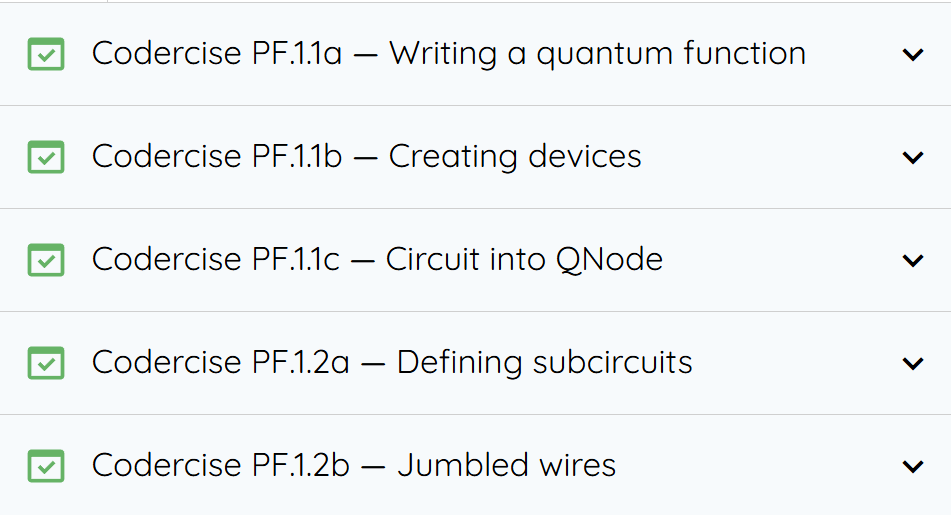

**Q1**

In [ ]:
def circuit(phi): # Write any arguments you need here
    """
    This quantum function implements the circuit shown above
    and returns the output quantum state
    """

    ####################
    ###YOUR CODE HERE###
    ####################

    qml.Hadamard(wires=0)
    qml.PauliX(wires=1)
    qml.CNOT(wires=[0,1])
    qml.RY(phi,wires=1)

    return qml.state()

**Q2**

Default

In [ ]:
dev_qubit = qml.device("default.qubit", wires = ["alice","bob"]) # Define the device here
dev_mixed = qml.device("default.mixed", wires = 2) # Define the device here

@qml.qnode(dev_qubit) # Choose the device you want
def example_circuit(theta):

    qml.RX(theta, wires = "alice" ) # Complete with wires in the device
    qml.CNOT(wires = ["alice","bob"] ) # Complete with wires in the device

    return qml.state()

print(example_circuit(0.3))

[0.98877108+0.j         0.        +0.j         0.        +0.j
 0.        -0.14943813j]


Mixed

In [ ]:
dev_qubit = qml.device("default.qubit", wires = ["alice","bob"]) # Define the device here
dev_mixed = qml.device("default.mixed", wires = 2) # Define the device here

@qml.qnode(dev_mixed) # Choose the device you want
def example_circuit(theta):

    qml.RX(theta, wires = 0 ) # Complete with wires in the device
    qml.CNOT(wires = [0,1] ) # Complete with wires in the device

    return qml.state()

print(example_circuit(0.3))

[[0.97766824+0.j        0.        +0.j        0.        +0.j
  0.        +0.1477601j]
 [0.        +0.j        0.        +0.j        0.        +0.j
  0.        +0.j       ]
 [0.        +0.j        0.        +0.j        0.        +0.j
  0.        +0.j       ]
 [0.        -0.1477601j 0.        +0.j        0.        +0.j
  0.02233176+0.j       ]]


**Q3**

In [ ]:
dev = qml.device("default.qubit", wires=2) # Define the device

circuit_qnode = qml.QNode(circuit, dev) # Assign a QNode to circuit"

print(circuit_qnode(0.3))

[-0.10566872+0.j  0.69916673+0.j  0.69916673+0.j  0.10566872+0.j]


**Q4**

In [ ]:
def subcircuit_1(angle):

    ####################
    ###YOUR CODE HERE###
    ####################
    qml.RX(angle, wires = 0)
    qml.PauliY(wires = 1)
    # No need to return anything

def subcircuit_2():

    ####################
    ###YOUR CODE HERE###
    ####################
    qml.Hadamard(wires = 0)
    qml.CNOT(wires = [0,1])
    # No need to return anything

dev = qml.device('default.qubit', wires = 2)

# Decorate this function to create a QNode
@qml.qnode(dev)
def full_circuit(theta, phi):

    ####################
    ###YOUR CODE HERE###
    ####################
    subcircuit_1(theta)
    subcircuit_2()
    subcircuit_1(phi)
    # Return the quantum state
    return qml.state()

**Q5**

In [ ]:
def subcircuit_1(angle, wire_list):
    """
    Implements the first subcircuit as a function of the RX gate angle
    and the list of wires wire_list on which the gates are applied
    """
    ####################
    ###YOUR CODE HERE###
    ####################
    qml.RX(angle, wires = wire_list[0])
    qml.PauliY(wires=wire_list[1])

def subcircuit_2(wire_list):
    """
    Implements the second subcircuit as a function of the list of wires
    wire_list on which the gates are applied
    """
    qml.Hadamard(wires=wire_list[0])
    qml.CNOT(wires=wire_list)
    ####################
    ###YOUR CODE HERE###
    ####################

dev = qml.device("default.qubit", wires = [0,1])

@qml.qnode(dev)
def full_circuit(theta, phi):
    """
    Builds the full quantum circuit given the input parameters
    """

    ####################
    ###YOUR CODE HERE###
    ####################
    subcircuit_1(theta,[0,1])
    subcircuit_2([0,1])
    subcircuit_1(phi,[1,0])

    return qml.state()

**Quantum Operations**

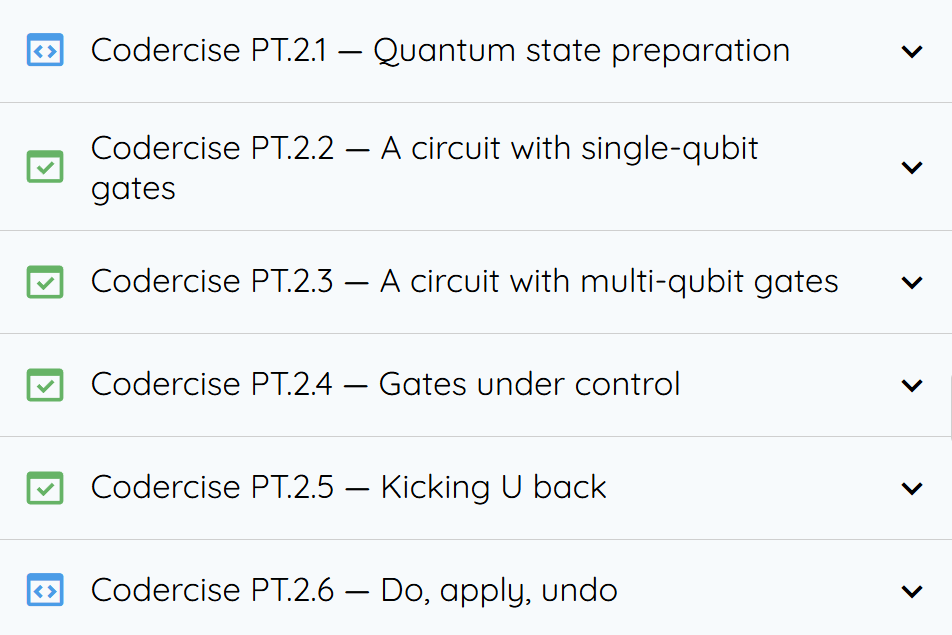

**Q1**

In [ ]:
dev = qml.device("default.qubit", wires = 3)

@qml.qnode(dev)
def prep_circuit(state=None):
    """
    Prepares the state alpha|000> + beta|010> + gamma|100>.
    Args:
    alpha, beta, gamma (np.complex): The coefficients of the quantum state
    to prepare.
    Returns:
    (np.array): The quantum state
    """
    qml.StatePrep(state, wires = range(3), normalize=True)
    ####################
    ###YOUR CODE HERE###
    ####################

    return qml.state()

alpha, beta, gamma = 1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3)
state = prep_circuit([alpha, beta, 0, gamma, 0, 0, 0, 0])
#prep_state = prep_circuit(state)
#print(state)

print("The prepared state is", state)

The prepared state is [0.57735027+0.j 0.57735027+0.j 0.        +0.j 0.57735027+0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]


**Q2**

In [ ]:
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def single_qubit_gates(theta, phi):
    """
    Implements the quantum circuit shown in the statement
    Args:
    - theta, phi (float): The arguments for the RX and RY gates, respectively
    Returns:
    - (np.array): The output quantum state.

    """

    ####################
    ###YOUR CODE HERE###
    ####################

    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.T(wires=0)
    qml.S(wires=1)
    qml.RX(theta,wires=0)
    qml.RZ(phi,wires=1)

    return qml.state()

theta, phi = np.pi/3, np.pi/4
print("The output state of the circuit is: ", single_qubit_gates(theta, phi))

The output state of the circuit is:  [ 0.49572243-0.39667667j -0.07003593+0.63102146j  0.30438071-0.0652631j
 -0.16908169+0.26137765j]


**Q3**

In [ ]:
dev = qml.device("default.qubit", wires = 3)

@qml.qnode(dev)
def multi_qubit_gates(theta,phi):
    """
    Applies the circuit shown the figure above
    Args:
    theta, phi (float): parameters of the CRX and CRY gates, in that order.
    Returns:
    - (np.array): the quantum state
    """

    #####################
    ###YOUR CODE HERE####
    #####################

    qml.Hadamard(wires=0)
    qml.CRY(phi,wires=[0,1])
    qml.CRX(theta,wires=[1,2])
    qml.S(wires=1)
    qml.T(wires=2)
    qml.Toffoli(wires=[0,1,2])
    qml.SWAP(wires=[0,2])

    return qml.state()

theta, phi = np.pi/3, np.pi/4
print("The output state is: \n", multi_qubit_gates(theta, phi))

The output state is: 
 [0.70710678+0.j         0.65328148+0.j         0.        +0.j
 0.09567086+0.09567086j 0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.23434479j]


**Q4**

In [ ]:
dev = qml.device("default.qubit", wires = 3)

@qml.qnode(dev)
def ctrl_circuit(theta,phi):
    """Implements the circuit shown in the Codercise statement
    Args:
        theta (float): Rotation angle for RX
        phi (float): Rotation angle for RY
    Returns:
        (numpy.array): The output state of the QNode
    """

    ####################
    ###YOUR CODE HERE###
    ####################
    qml.RY(phi,wires=0)
    qml.Hadamard(wires=1)
    qml.RX(theta,wires=2)
    qml.ctrl(qml.S,control=(0))(wires=1)
    qml.ctrl(qml.T,control=(1),control_values=(0))(wires=2)
    qml.ctrl(qml.Hadamard,control=2)(wires=0)

    return qml.state()

**Q5**

In [ ]:
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def phase_kickback(matrix):
    """Applies phase kickback to a single-qubit operator whose matrix is known
    Args:S
    - matrix (numpy.array): A 2x2 matrix
    Returns:
    - (numpy.array): The output state after applying phase kickback
    """

    ####################
    ###YOUR CODE HERE###
    ####################

    qml.Hadamard(wires=0)
    qml.ControlledQubitUnitary(matrix, control_wires = 0, wires = 1)
    qml.Hadamard(wires=0)

    return qml.state()

matrix = np.array([[-0.69165024-0.50339329j,  0.28335369-0.43350413j],
    [ 0.1525734 -0.4949106j , -0.82910055-0.2106588j ]])

print("The state after phase kickback is: \n" , phase_kickback(matrix))

The state after phase kickback is: 
 [ 0.15417488-0.25169664j  0.0762867 -0.2474553j   0.84582512+0.25169664j
 -0.0762867 +0.2474553j ]


**Q6**

In [ ]:
dev = qml.device("default.qubit")

def do(k):

    qml.StatePrep([1,k], wires = [0], normalize = True)

def apply(theta):

    qml.IsingXX(theta,wires=[1,2])

@qml.qnode(dev)
def do_apply_undo(k,theta):
    """
    Applies V, controlled-U, and the inverse of V
    Args:
    - k, theta: The parameters for do and apply (V and U) respectively
    Returns:
    - (np.array): The output state of the routine
    """

    ####################
    ###YOUR CODE HERE###
    ####################
    do(k)
    apply(theta)
    qml.adjoint(do)(k)

    return qml.state()

k, theta = 0.5, 0.8

print("The output state is: \n", do_apply_undo(k, theta))

The output state is: 
 [0.92106099+0.j         0.        +0.j         0.        +0.j
 0.        -0.38941834j 0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j        ]
